In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\AMZN.csv.csv",parse_dates=["Date"],index_col="Date")

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [5]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
df.duplicated()

Date
2014-01-02    False
2014-01-03    False
2014-01-06    False
2014-01-07    False
2014-01-08    False
              ...  
2018-12-24    False
2018-12-26    False
2018-12-27    False
2018-12-28    False
2018-12-31    False
Length: 1258, dtype: bool

In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999803,0.999632,0.999441,0.999441,0.205723
High,0.999803,1.000000,0.999557,0.999701,0.999701,0.211893
Low,0.999632,0.999557,1.000000,0.999758,0.999758,0.193306
Close,0.999441,0.999701,0.999758,1.000000,1.000000,0.201353
Adj Close,0.999441,0.999701,0.999758,1.000000,1.000000,0.201353
Volume,0.205723,0.211893,0.193306,0.201353,0.201353,1.000000


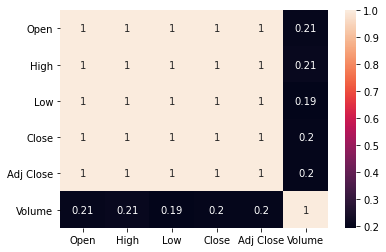

In [9]:
sns.heatmap(df.corr(),annot=True)

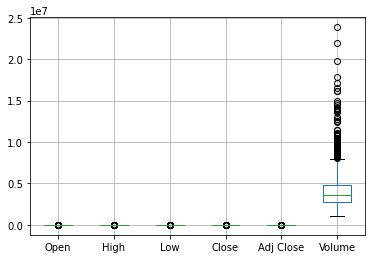

In [10]:
df.boxplot()

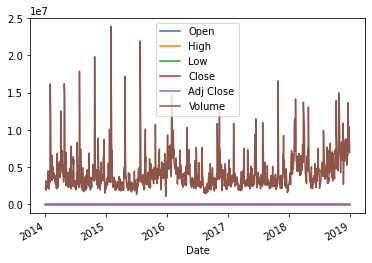

In [11]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152814F09D0>,
      dtype=object)

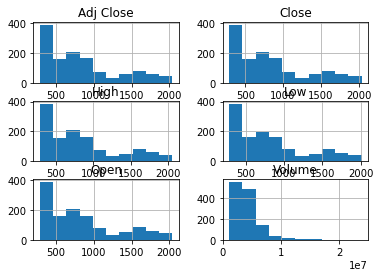

In [12]:
df.hist()

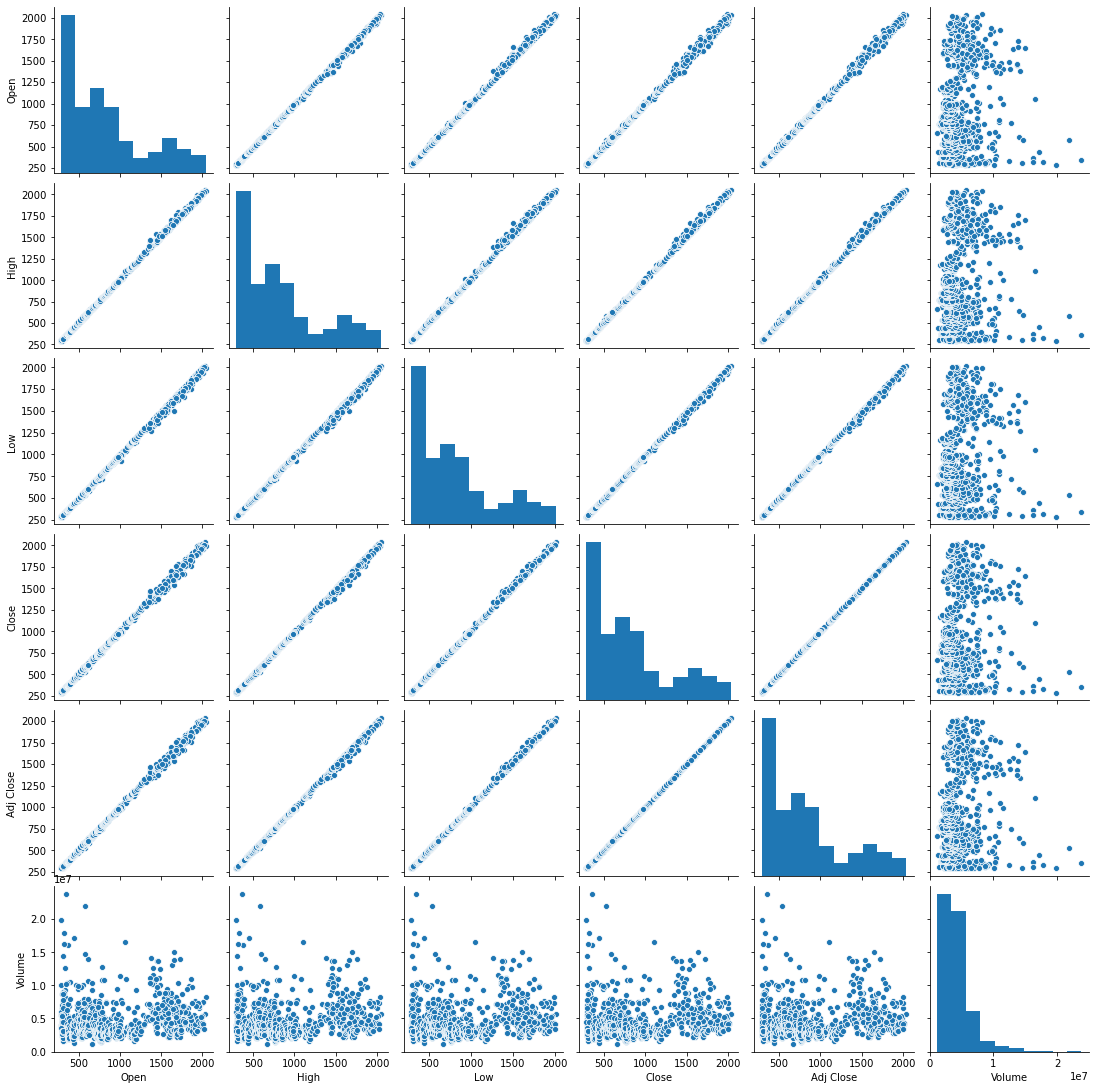

In [13]:
sns.pairplot(df)

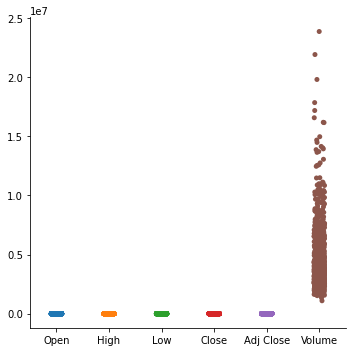

In [15]:
sns.catplot(data=df)

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
res=adfuller(df.Volume)
p_val=res[1]
if p_val>0.05 :
    print("Not Stationary")
else:
    print("Stationary")

Stationary


In [18]:
res

(-7.320238540501803,
 1.1994782855945308e-10,
 8,
 1249,
 {'1%': -3.4355964295197743,
  '5%': -2.863856825923603,
  '10%': -2.5680035060041626},
 39141.273008983684)

<ipython-input-19-630501db6e77>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp=tsa.seasonal_decompose(df.Volume,freq=52)


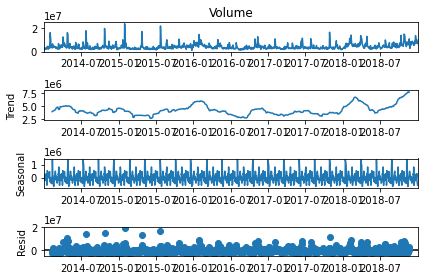

In [19]:
from statsmodels.api import tsa
decomp=tsa.seasonal_decompose(df.Volume,freq=52)
fig=decomp.plot()

# moving average

#simple moving average

In [20]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\AMZN.csv.csv",parse_dates=["Date"],index_col="Date")

In [21]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [22]:
data=df[["Volume"]]
data.head()

,Volume
Date,
2014-01-02,2137800
2014-01-03,2210200
2014-01-06,3170600
2014-01-07,1916000
2014-01-08,2316500


In [23]:
data.isna().sum()

Volume    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  1258 non-null   int64
dtypes: int64(1)
memory usage: 19.7 KB


In [25]:
data["SMA3"]=data["Volume"].rolling(window=3).mean()

<ipython-input-25-111b6631f6a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA3"]=data["Volume"].rolling(window=3).mean()


In [26]:
data["SMA4"]=data["Volume"].rolling(window=4).mean()

<ipython-input-26-e1083c7afff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA4"]=data["Volume"].rolling(window=4).mean()


In [27]:
data["SMA8"]=data["Volume"].rolling(window=8).mean()

<ipython-input-27-eb76557bed4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SMA8"]=data["Volume"].rolling(window=8).mean()


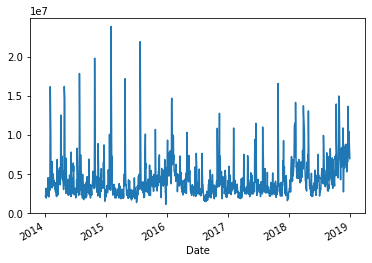

In [28]:
data["Volume"].plot()

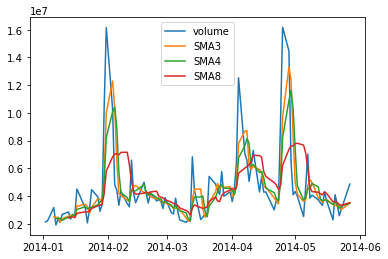

In [29]:
my_data=data.head(100)
plt.plot(my_data["Volume"],label="volume")
plt.plot(my_data["SMA3"],label="SMA3")
plt.plot(my_data["SMA4"],label="SMA4")
plt.plot(my_data["SMA8"],label="SMA8")
plt.legend()

In [30]:
data.head()

,Volume,SMA3,SMA4,SMA8
Date,,,,
2014-01-02,2137800,NaN,NaN,NaN
2014-01-03,2210200,NaN,NaN,NaN
2014-01-06,3170600,2.506200e+06,NaN,NaN
2014-01-07,1916000,2.432267e+06,2358650.0,NaN
2014-01-08,2316500,2.467700e+06,2403325.0,NaN


#cumulative moving average

In [31]:
data["CMA_3"]=data["Volume"].expanding(min_periods=3).mean()

<ipython-input-31-0398ce4fff46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CMA_3"]=data["Volume"].expanding(min_periods=3).mean()


In [32]:
data["CMA4"]=data["Volume"].expanding(min_periods=4).mean()

In [33]:
data["CMA8"]=data["Volume"].expanding(min_periods=8).mean()

In [34]:
data.head()

,Volume,SMA3,SMA4,SMA8,CMA_3,CMA4,CMA8
Date,,,,,,,
2014-01-02,2137800,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,2210200,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,3170600,2.506200e+06,NaN,NaN,2506200.0,NaN,NaN
2014-01-07,1916000,2.432267e+06,2358650.0,NaN,2358650.0,2358650.0,NaN
2014-01-08,2316500,2.467700e+06,2403325.0,NaN,2350220.0,2350220.0,NaN


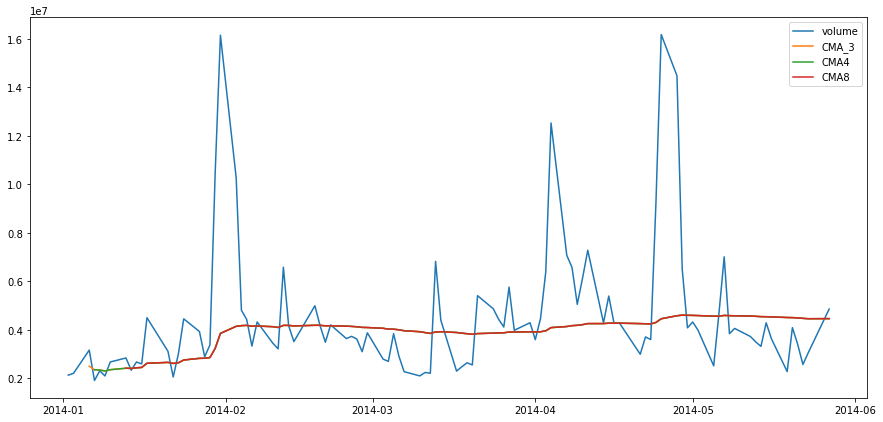

In [35]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Volume"],label="volume")
plt.plot(data_plot["CMA_3"],label="CMA_3")
plt.plot(data_plot["CMA4"],label="CMA4")
plt.plot(data_plot["CMA8"],label="CMA8")
plt.legend()

#Exponential moving average

In [36]:
data["EMA"]=data["Volume"].ewm(halflife=2).mean()

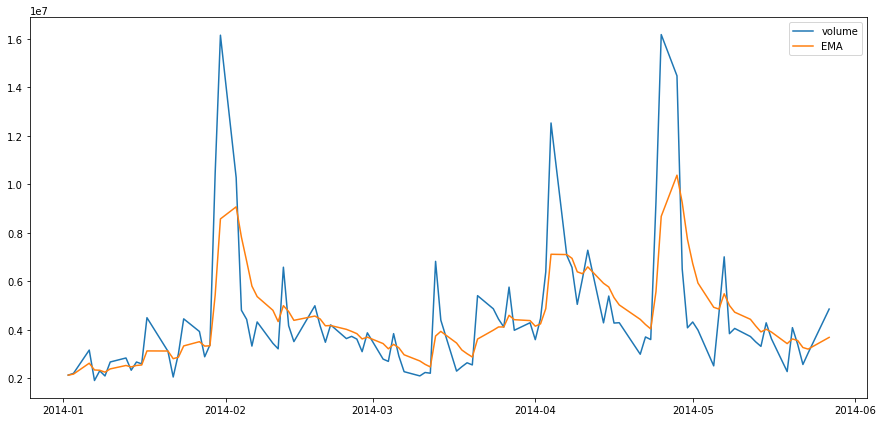

In [37]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Volume"],label="volume")
plt.plot(data_plot["EMA"],label="EMA")
plt.legend()

In [38]:
data.head()

,Volume,SMA3,SMA4,SMA8,CMA_3,CMA4,CMA8,EMA
Date,,,,,,,,
2014-01-02,2137800,NaN,NaN,NaN,NaN,NaN,NaN,2.137800e+06
2014-01-03,2210200,NaN,NaN,NaN,NaN,NaN,NaN,2.180211e+06
2014-01-06,3170600,2.506200e+06,NaN,NaN,2506200.0,NaN,NaN,2.628938e+06
2014-01-07,1916000,2.432267e+06,2358650.0,NaN,2358650.0,2358650.0,NaN,2.350519e+06
2014-01-08,2316500,2.467700e+06,2403325.0,NaN,2350220.0,2350220.0,NaN,2.338415e+06


# comparing all the values

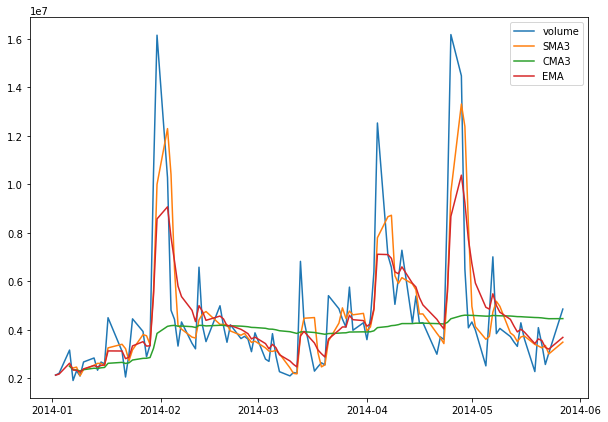

In [39]:
plt.figure(figsize=[10,7])
data_plot=data.head(100)
plt.plot(data_plot["Volume"],label="volume")
plt.plot(data_plot["SMA3"],label="SMA3")
plt.plot(data_plot["CMA_3"],label="CMA3")
plt.plot(data_plot["EMA"],label="EMA")
plt.legend()